# Importing all the important libraries

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display
from utils.dataframe import (
    load_models_df, load_model_variants_gen_df
)

# Common

In [2]:
# Set figure size
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

# Baseline Performance: LSTM, XLM-R, and mBERT

## Data Preparation

In [3]:
# load data
evaluation_results = load_models_df("evaluation_results")

In [4]:
display(evaluation_results)

,name,BLEU,ROUGE-1,ROUGE-2,ROUGE-L,chrF-S,BERT Score,Perplexity
0,LSTM BPE,0.855064,0.298951,0.151467,0.298951,98.877475,0.995052,6.046939e+00
1,LSTM Unigram,0.855391,0.299182,0.151693,0.299182,98.937219,0.995120,6.046573e+00
2,mBERT,0.111619,0.218939,0.097964,0.218892,79.220231,0.879065,7.655345e+00
3,XLM-R,0.458155,0.253531,0.116545,0.253524,88.050207,0.965338,3.318897e+11


## Visualization

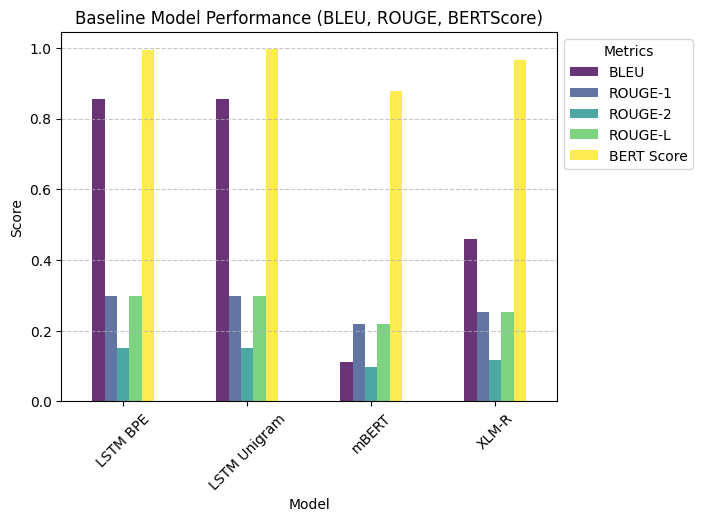

In [5]:
# Plot BLEU, ROUGE-1, ROUGE-2, and ROUGE-L Scores
metrics = ["BLEU", "ROUGE-1", "ROUGE-2", "ROUGE-L", "BERT Score"]
evaluation_results.set_index("name")[metrics].plot(kind="bar", cmap="viridis", alpha=0.8)

# Set labels and title
plt.xlabel("Model")
plt.ylabel("Score")
plt.title("Baseline Model Performance (BLEU, ROUGE, BERTScore)")
plt.xticks(rotation=45)
plt.legend(title="Metrics", loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

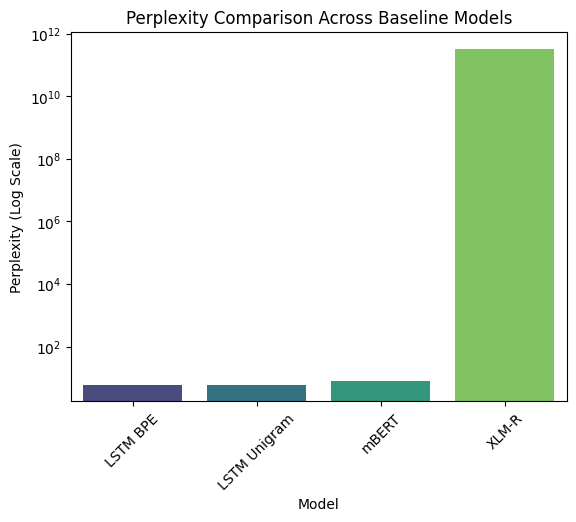

In [6]:
# Plot Perplexity scores
sns.barplot(x=evaluation_results["name"], y=evaluation_results["Perplexity"], hue=evaluation_results["name"], palette="viridis", legend=False)

# Set labels and title
plt.xlabel("Model")
plt.ylabel("Perplexity (Log Scale)")
plt.title("Perplexity Comparison Across Baseline Models")
plt.xticks(rotation=45)
plt.yscale("log")  # Log scale for better visibility

# Show plot
plt.show()

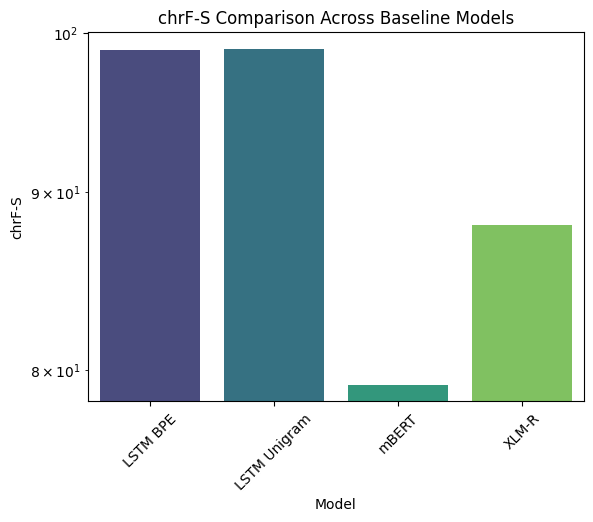

In [7]:
# Plot chrF-S scores
sns.barplot(x=evaluation_results["name"], y=evaluation_results["chrF-S"], hue=evaluation_results["name"], palette="viridis", legend=False)

# Set labels and title
plt.xlabel("Model")
plt.ylabel("chrF-S")
plt.title("chrF-S Comparison Across Baseline Models")
plt.xticks(rotation=45)
plt.yscale("log")  # Log scale for better visibility

# Show plot
plt.show()

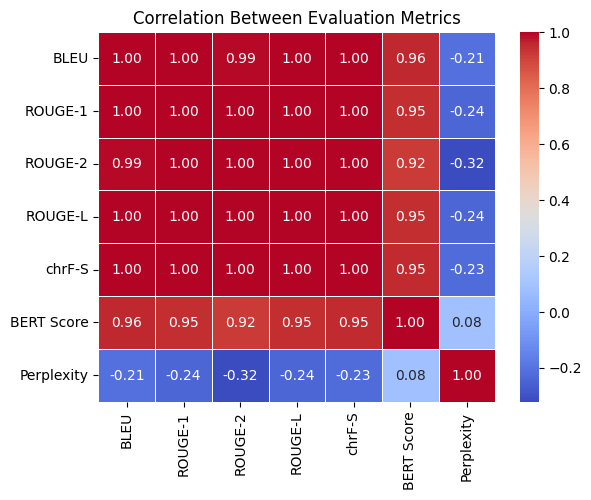

In [8]:
# Compute correlation matrix
correlation_matrix = evaluation_results.drop(columns=["name"]).corr()

# Generate heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Set title
plt.title("Correlation Between Evaluation Metrics")

# Show plot
plt.show()

# First Fine-Tuning (mBERT, XLM-R, and mT5)

## Data Preparation

In [9]:
# load data
trained_evaluation_results = load_model_variants_gen_df("trained_evaluation_results")

In [10]:
display(trained_evaluation_results)

,name,BLEU,ROUGE-1,ROUGE-2,ROUGE-L,chrF-S,BERT Score,Perplexity
0,mBERT BPE,0.412640,0.308111,0.160576,0.308111,99.932008,0.999906,2.264543e+01
1,mBERT UNIGRAM,0.412640,0.308111,0.160576,0.308111,99.932008,0.999906,3.952771e+01
2,mT5 BPE,0.038441,0.179186,0.076829,0.179155,31.073819,0.773639,8.696416e+03
3,mT5 UNIGRAM,0.037098,0.177381,0.077179,0.177349,32.306038,0.775723,8.071516e+03
4,XLM-R BPE,0.876002,0.308115,0.160583,0.308115,99.972363,0.999956,3.164637e+11
5,XLM-R UNIGRAM,0.876002,0.308115,0.160583,0.308115,99.972363,0.999956,5.839325e+11


## Visualization

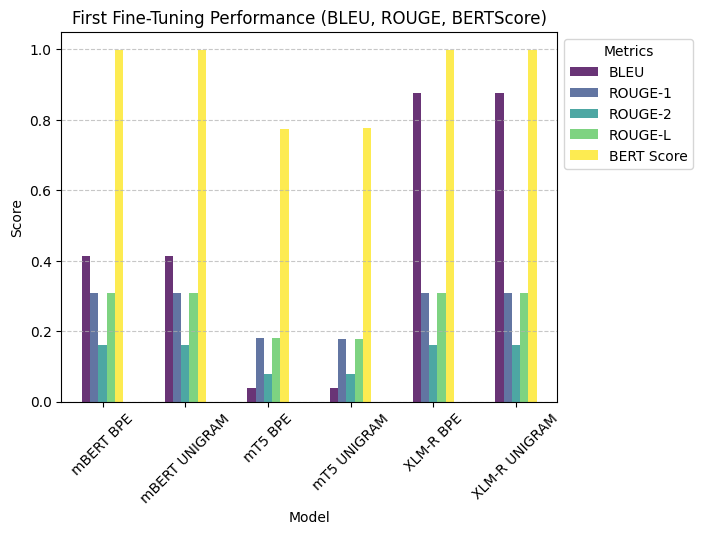

In [11]:
# Plot BLEU, ROUGE-1, ROUGE-2, and ROUGE-L Scores
metrics = ["BLEU", "ROUGE-1", "ROUGE-2", "ROUGE-L", "BERT Score"]
trained_evaluation_results.set_index("name")[metrics].plot(kind="bar", cmap="viridis", alpha=0.8)

# Set labels and title
plt.xlabel("Model")
plt.ylabel("Score")
plt.title("First Fine-Tuning Performance (BLEU, ROUGE, BERTScore)")
plt.xticks(rotation=45)
plt.legend(title="Metrics", loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

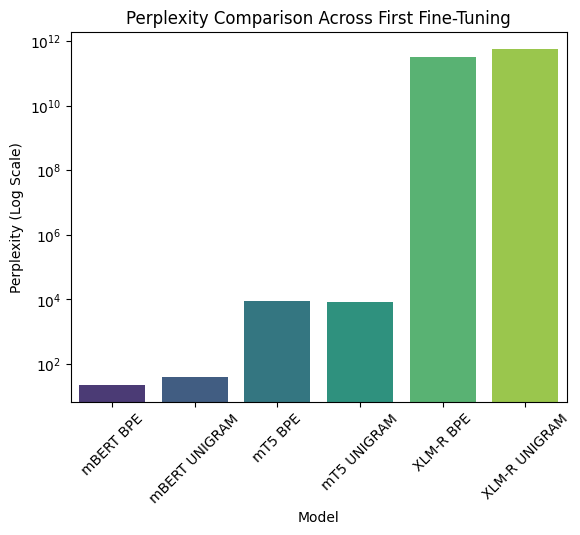

In [12]:
# Plot Perplexity scores
sns.barplot(x=trained_evaluation_results["name"], y=trained_evaluation_results["Perplexity"], hue=trained_evaluation_results["name"], palette="viridis", legend=False)

# Set labels and title
plt.xlabel("Model")
plt.ylabel("Perplexity (Log Scale)")
plt.title("Perplexity Comparison Across First Fine-Tuning")
plt.xticks(rotation=45)
plt.yscale("log")  # Log scale for better visibility

# Show plot
plt.show()

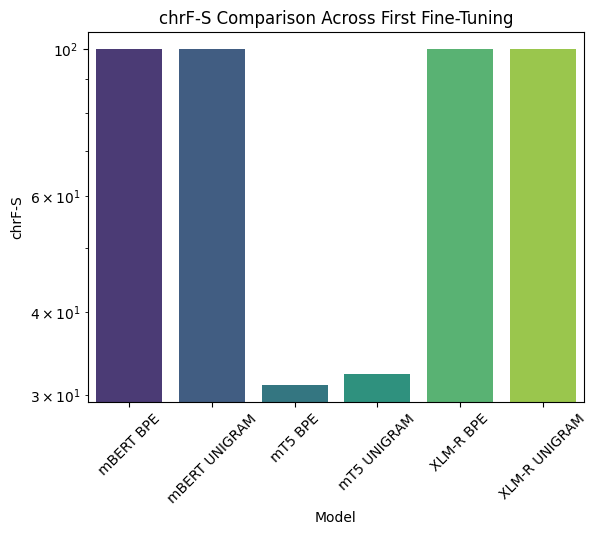

In [13]:
# Plot chrF-S scores
sns.barplot(x=trained_evaluation_results["name"], y=trained_evaluation_results["chrF-S"], hue=trained_evaluation_results["name"], palette="viridis", legend=False)

# Set labels and title
plt.xlabel("Model")
plt.ylabel("chrF-S")
plt.title("chrF-S Comparison Across First Fine-Tuning")
plt.xticks(rotation=45)
plt.yscale("log")  # Log scale for better visibility

# Show plot
plt.show()

# Second Fine-Tuning (Adding Contextual Embeddings)

## Data Preparation

In [14]:
# load data
embedded_trained_evaluation_results = load_model_variants_gen_df("embedded_trained_evaluation_results")

In [15]:
display(embedded_trained_evaluation_results)

,name,BLEU,ROUGE-1,ROUGE-2,ROUGE-L,chrF-S,BERT Score,Perplexity
0,mBERT BPE,0.412640,0.308111,0.160576,0.308111,99.932008,0.999906,1.276253e+01
1,mBERT UNIGRAM,0.412640,0.308111,0.160576,0.308111,99.932008,0.999906,1.276253e+01
2,XLM-R BPE,0.876002,0.308115,0.160583,0.308115,99.972363,0.999956,3.076463e+11
3,XLM-R UNIGRAM,0.876002,0.308115,0.160583,0.308115,99.972363,0.999956,3.076463e+11


In [16]:
# remove mt5
filtered_embedded_trained_evaluation_results = trained_evaluation_results[~trained_evaluation_results['name'].str.startswith('mT5')]

In [17]:
display(filtered_embedded_trained_evaluation_results)

,name,BLEU,ROUGE-1,ROUGE-2,ROUGE-L,chrF-S,BERT Score,Perplexity
0,mBERT BPE,0.412640,0.308111,0.160576,0.308111,99.932008,0.999906,2.264543e+01
1,mBERT UNIGRAM,0.412640,0.308111,0.160576,0.308111,99.932008,0.999906,3.952771e+01
4,XLM-R BPE,0.876002,0.308115,0.160583,0.308115,99.972363,0.999956,3.164637e+11
5,XLM-R UNIGRAM,0.876002,0.308115,0.160583,0.308115,99.972363,0.999956,5.839325e+11


In [18]:
# Add a new column to each DataFrame to differentiate them
embedded_trained_evaluation_results.loc[:, 'Fine-Tuning'] = 'Second Fine-Tuning'
filtered_embedded_trained_evaluation_results.loc[:, 'Fine-Tuning'] = 'First Fine-Tuning'

/var/folders/l9/n8mq10f11zg9dn2wpxbzhbgc0000gn/T/ipykernel_440/1771773030.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_embedded_trained_evaluation_results.loc[:, 'Fine-Tuning'] = 'First Fine-Tuning'


In [19]:
# Concatenate the two DataFrames
embedded_combined_df = pd.concat([filtered_embedded_trained_evaluation_results, embedded_trained_evaluation_results])

In [20]:
display(embedded_combined_df)

,name,BLEU,ROUGE-1,ROUGE-2,ROUGE-L,chrF-S,BERT Score,Perplexity,Fine-Tuning
0,mBERT BPE,0.412640,0.308111,0.160576,0.308111,99.932008,0.999906,2.264543e+01,First Fine-Tuning
1,mBERT UNIGRAM,0.412640,0.308111,0.160576,0.308111,99.932008,0.999906,3.952771e+01,First Fine-Tuning
4,XLM-R BPE,0.876002,0.308115,0.160583,0.308115,99.972363,0.999956,3.164637e+11,First Fine-Tuning
5,XLM-R UNIGRAM,0.876002,0.308115,0.160583,0.308115,99.972363,0.999956,5.839325e+11,First Fine-Tuning
0,mBERT BPE,0.412640,0.308111,0.160576,0.308111,99.932008,0.999906,1.276253e+01,Second Fine-Tuning
1,mBERT UNIGRAM,0.412640,0.308111,0.160576,0.308111,99.932008,0.999906,1.276253e+01,Second Fine-Tuning
2,XLM-R BPE,0.876002,0.308115,0.160583,0.308115,99.972363,0.999956,3.076463e+11,Second Fine-Tuning
3,XLM-R UNIGRAM,0.876002,0.308115,0.160583,0.308115,99.972363,0.999956,3.076463e+11,Second Fine-Tuning


## Visualization

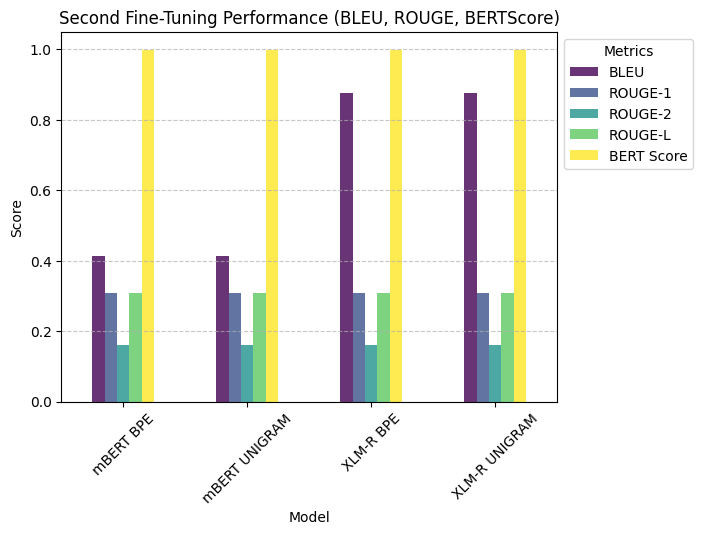

In [21]:
# Plot BLEU, ROUGE-1, ROUGE-2, and ROUGE-L Scores
metrics = ["BLEU", "ROUGE-1", "ROUGE-2", "ROUGE-L", "BERT Score"]
embedded_trained_evaluation_results.set_index("name")[metrics].plot(kind="bar", cmap="viridis", alpha=0.8)

# Set labels and title
plt.xlabel("Model")
plt.ylabel("Score")
plt.title("Second Fine-Tuning Performance (BLEU, ROUGE, BERTScore)")
plt.xticks(rotation=45)
plt.legend(title="Metrics", loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

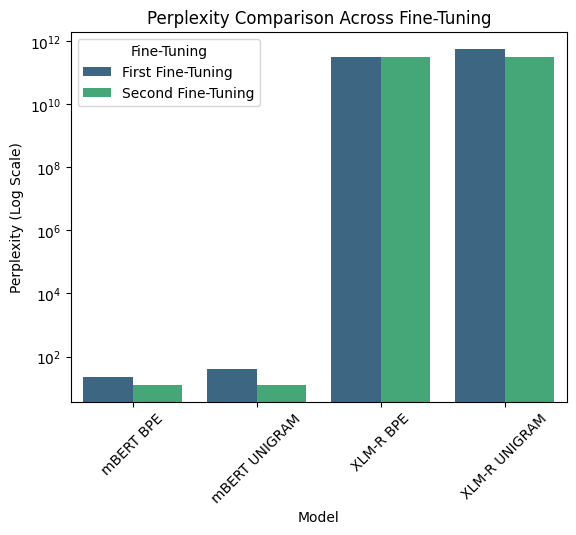

In [22]:
# Plot Perplexity scores for both datasets in one plot
sns.barplot(x="name", y="Perplexity", hue="Fine-Tuning", data=embedded_combined_df, palette="viridis")

# Set labels and title
plt.xlabel("Model")
plt.ylabel("Perplexity (Log Scale)")
plt.title("Perplexity Comparison Across Fine-Tuning")
plt.xticks(rotation=45)
plt.yscale("log")  # Log scale for better visibility

# Show plot
plt.show()

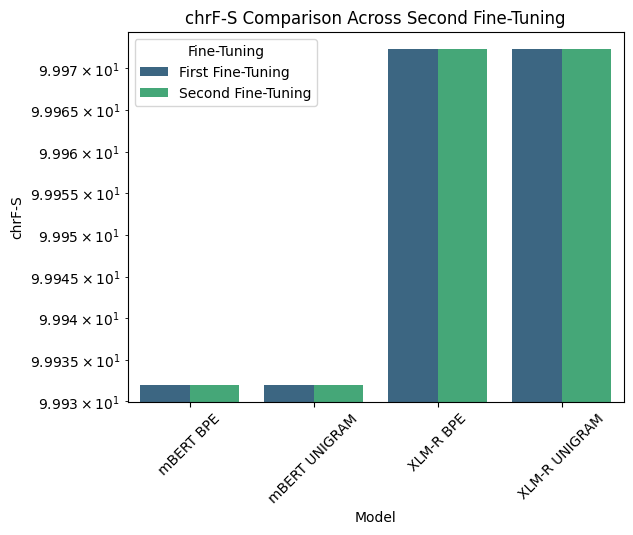

In [23]:
# Plot chrF-S scores
sns.barplot(x="name", y="chrF-S", hue="Fine-Tuning", data=embedded_combined_df, palette="viridis")

# Set labels and title
plt.xlabel("Model")
plt.ylabel("chrF-S")
plt.title("chrF-S Comparison Across Second Fine-Tuning")
plt.xticks(rotation=45)
plt.yscale("log")  # Log scale for better visibility

# Show plot
plt.show()

# Final Model Performance (mT5 with Contextual Embeddings)

## Data Preparation

In [24]:
# load data
final_evaluation_results = load_model_variants_gen_df("final_evaluation_results")

In [25]:
display(final_evaluation_results)

,name,BLEU,ROUGE-1,ROUGE-2,ROUGE-L,chrF-S,BERT Score,Perplexity
0,BPE,0.039361,0.183905,0.080225,0.183851,33.708929,0.784354,3861.230787
1,UNIGRAM,0.037648,0.182512,0.080458,0.182468,35.214015,0.789341,3756.724939


In [ ]:
# get only mt5
mT5_trained_evaluation_results = trained_evaluation_results[trained_evaluation_results['name'].str.startswith('mT5')]

# Remove 'mT5' from the 'name' column (e.g., 'mT5 BPE' -> 'BPE')
mT5_trained_evaluation_results['name'] = mT5_trained_evaluation_results['name'].str.replace('mT5 ', '', regex=False)

In [33]:
display(mT5_trained_evaluation_results)

,name,BLEU,ROUGE-1,ROUGE-2,ROUGE-L,chrF-S,BERT Score,Perplexity
2,BPE,0.038441,0.179186,0.076829,0.179155,31.073819,0.773639,8696.415739
3,UNIGRAM,0.037098,0.177381,0.077179,0.177349,32.306038,0.775723,8071.515994


In [34]:
filtered_final_trained_evaluation_results = mT5_trained_evaluation_results.copy()

In [35]:
# Add a new column to each DataFrame to differentiate them
final_evaluation_results.loc[:, 'Fine-Tuning'] = 'Final Model'
filtered_final_trained_evaluation_results.loc[:, 'Fine-Tuning'] = 'First Fine-Tuning'

In [36]:
# Concatenate the two DataFrames
final_combined_df = pd.concat([filtered_final_trained_evaluation_results, final_evaluation_results])

In [37]:
display(final_combined_df)

,name,BLEU,ROUGE-1,ROUGE-2,ROUGE-L,chrF-S,BERT Score,Perplexity,Fine-Tuning
2,BPE,0.038441,0.179186,0.076829,0.179155,31.073819,0.773639,8696.415739,First Fine-Tuning
3,UNIGRAM,0.037098,0.177381,0.077179,0.177349,32.306038,0.775723,8071.515994,First Fine-Tuning
0,BPE,0.039361,0.183905,0.080225,0.183851,33.708929,0.784354,3861.230787,Final Model
1,UNIGRAM,0.037648,0.182512,0.080458,0.182468,35.214015,0.789341,3756.724939,Final Model


## Visualization

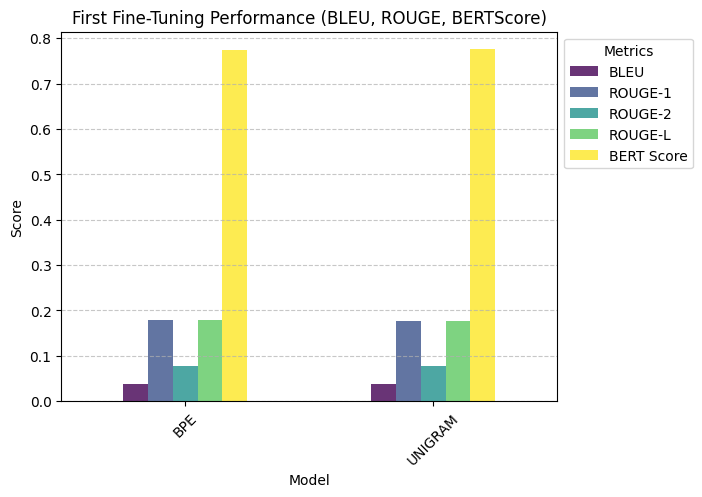

In [38]:
# Plot BLEU, ROUGE-1, ROUGE-2, and ROUGE-L Scores
metrics = ["BLEU", "ROUGE-1", "ROUGE-2", "ROUGE-L", "BERT Score"]
mT5_trained_evaluation_results.set_index("name")[metrics].plot(kind="bar", cmap="viridis", alpha=0.8)

# Set labels and title
plt.xlabel("Model")
plt.ylabel("Score")
plt.title("First Fine-Tuning Performance (BLEU, ROUGE, BERTScore)")
plt.xticks(rotation=45)
plt.legend(title="Metrics", loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

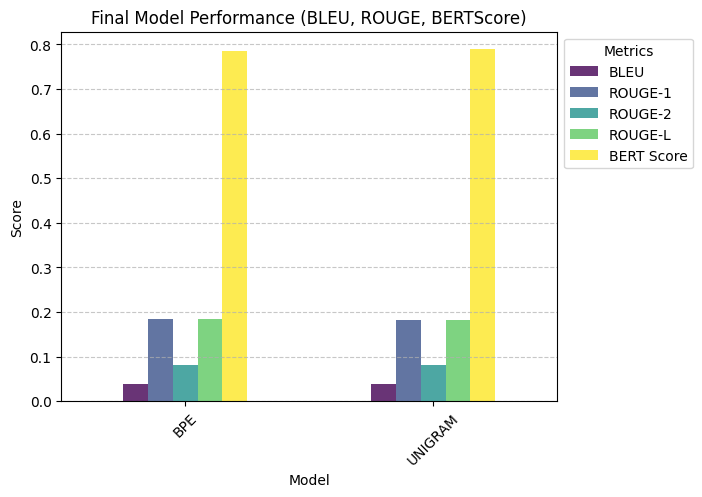

In [39]:
# Plot BLEU, ROUGE-1, ROUGE-2, and ROUGE-L Scores
metrics = ["BLEU", "ROUGE-1", "ROUGE-2", "ROUGE-L", "BERT Score"]
final_evaluation_results.set_index("name")[metrics].plot(kind="bar", cmap="viridis", alpha=0.8)

# Set labels and title
plt.xlabel("Model")
plt.ylabel("Score")
plt.title("Final Model Performance (BLEU, ROUGE, BERTScore)")
plt.xticks(rotation=45)
plt.legend(title="Metrics", loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

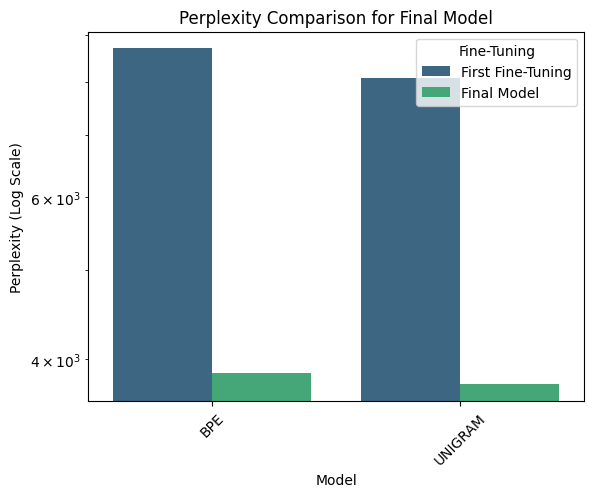

In [41]:
# Plot Perplexity scores for both datasets in one plot
sns.barplot(x="name", y="Perplexity", hue="Fine-Tuning", data=final_combined_df, palette="viridis")

# Set labels and title
plt.xlabel("Model")
plt.ylabel("Perplexity (Log Scale)")
plt.title("Perplexity Comparison for Final Model")
plt.xticks(rotation=45)
plt.yscale("log")  # Log scale for better visibility

# Show plot
plt.show()

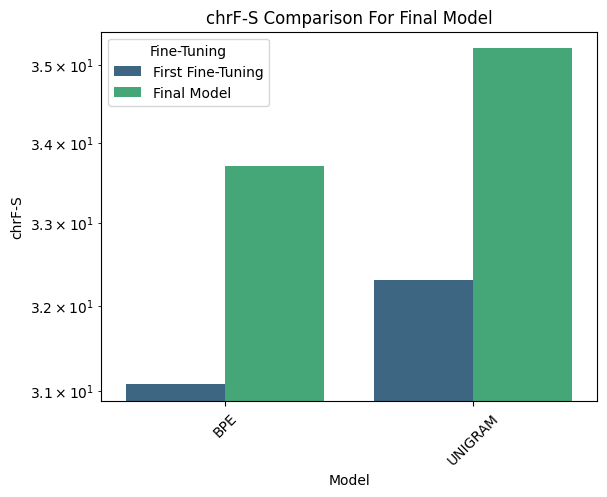

In [42]:
# Plot chrF-S scores
sns.barplot(x="name", y="chrF-S", hue="Fine-Tuning", data=final_combined_df, palette="viridis")

# Set labels and title
plt.xlabel("Model")
plt.ylabel("chrF-S")
plt.title("chrF-S Comparison For Final Model")
plt.xticks(rotation=45)
plt.yscale("log")  # Log scale for better visibility

# Show plot
plt.show()

# Quantitative and Qualitative Analysis

## Data Preparation

In [ ]:
# load data
baseline_evaluation_results = load_models_df("evaluation_results")

# get lstm
baseline_evaluation_results = baseline_evaluation_results[baseline_evaluation_results['name'].str.startswith('LSTM')]

display(baseline_evaluation_results)

,name,BLEU,ROUGE-1,ROUGE-2,ROUGE-L,chrF-S,BERT Score,Perplexity
0,LSTM BPE,0.855064,0.298951,0.151467,0.298951,98.877475,0.995052,6.046939
1,LSTM Unigram,0.855391,0.299182,0.151693,0.299182,98.937219,0.995120,6.046573


In [45]:
# load data
embedded_trained_evaluation_results = load_model_variants_gen_df("embedded_trained_evaluation_results")

# remove mt5
embedded_trained_evaluation_results = embedded_trained_evaluation_results[~embedded_trained_evaluation_results['name'].str.startswith('mT5')]

display(embedded_trained_evaluation_results)

,name,BLEU,ROUGE-1,ROUGE-2,ROUGE-L,chrF-S,BERT Score,Perplexity
0,mBERT BPE,0.412640,0.308111,0.160576,0.308111,99.932008,0.999906,1.276253e+01
1,mBERT UNIGRAM,0.412640,0.308111,0.160576,0.308111,99.932008,0.999906,1.276253e+01
2,XLM-R BPE,0.876002,0.308115,0.160583,0.308115,99.972363,0.999956,3.076463e+11
3,XLM-R UNIGRAM,0.876002,0.308115,0.160583,0.308115,99.972363,0.999956,3.076463e+11


In [46]:
# load data
final_evaluation_results = load_model_variants_gen_df("final_evaluation_results")

# Add 'mT5' to the 'name' column (e.g., 'BPE' -> 'mT5 BPE')
final_evaluation_results['name'] = final_evaluation_results['name'].str.replace('^BPE$', 'mT5 BPE', regex=True)

display(final_evaluation_results)

,name,BLEU,ROUGE-1,ROUGE-2,ROUGE-L,chrF-S,BERT Score,Perplexity
0,mT5 BPE,0.039361,0.183905,0.080225,0.183851,33.708929,0.784354,3861.230787
1,UNIGRAM,0.037648,0.182512,0.080458,0.182468,35.214015,0.789341,3756.724939


In [47]:
# Concatenate the two DataFrames
final_combined_df = pd.concat([baseline_evaluation_results, embedded_trained_evaluation_results, final_evaluation_results])

display(final_combined_df)

,name,BLEU,ROUGE-1,ROUGE-2,ROUGE-L,chrF-S,BERT Score,Perplexity
0,LSTM BPE,0.855064,0.298951,0.151467,0.298951,98.877475,0.995052,6.046939e+00
1,LSTM Unigram,0.855391,0.299182,0.151693,0.299182,98.937219,0.995120,6.046573e+00
0,mBERT BPE,0.412640,0.308111,0.160576,0.308111,99.932008,0.999906,1.276253e+01
1,mBERT UNIGRAM,0.412640,0.308111,0.160576,0.308111,99.932008,0.999906,1.276253e+01
2,XLM-R BPE,0.876002,0.308115,0.160583,0.308115,99.972363,0.999956,3.076463e+11
3,XLM-R UNIGRAM,0.876002,0.308115,0.160583,0.308115,99.972363,0.999956,3.076463e+11
0,mT5 BPE,0.039361,0.183905,0.080225,0.183851,33.708929,0.784354,3.861231e+03
1,UNIGRAM,0.037648,0.182512,0.080458,0.182468,35.214015,0.789341,3.756725e+03


## Visualization

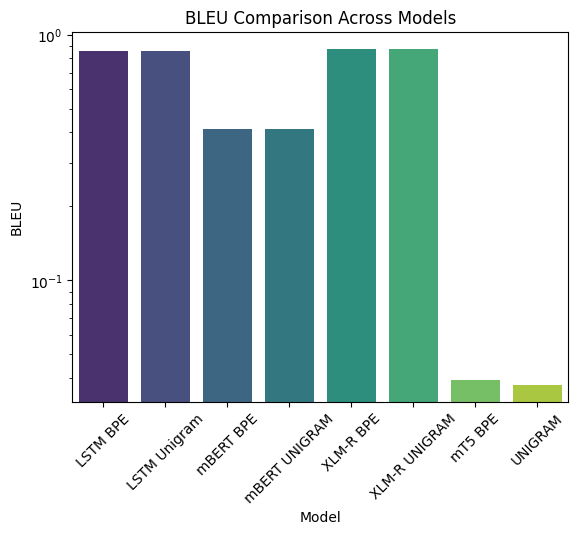

In [68]:
# BLEU Score Chart
sns.barplot(x=final_combined_df["name"], y=final_combined_df["BLEU"], hue=final_combined_df["name"], palette="viridis", legend=False)

# Set labels and title
plt.xlabel("Model")
plt.ylabel("BLEU")
plt.title("BLEU Comparison Across Models")
plt.xticks(rotation=45)
plt.yscale("log")  # Log scale for better visibility

# Show plot
plt.show()

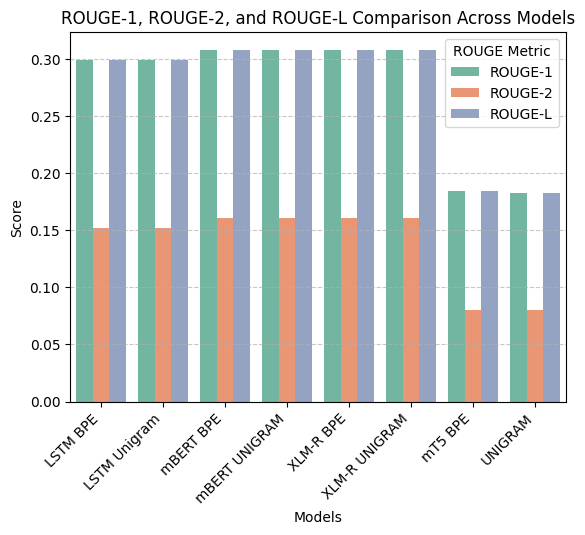

In [69]:
# Melt the dataframe to reshape it for seaborn
melted_df = final_combined_df.melt(id_vars=["name"], value_vars=["ROUGE-1", "ROUGE-2", "ROUGE-L"], 
                                   var_name="ROUGE Metric", value_name="Score")

# Create the barplot with seaborn
sns.barplot(x="name", y="Score", hue="ROUGE Metric", data=melted_df, palette="Set2")

# Labels and Title
plt.xlabel("Models")
plt.ylabel("Score")
plt.title("ROUGE-1, ROUGE-2, and ROUGE-L Comparison Across Models")
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle="--", alpha=0.7)

# Show plot
plt.show()

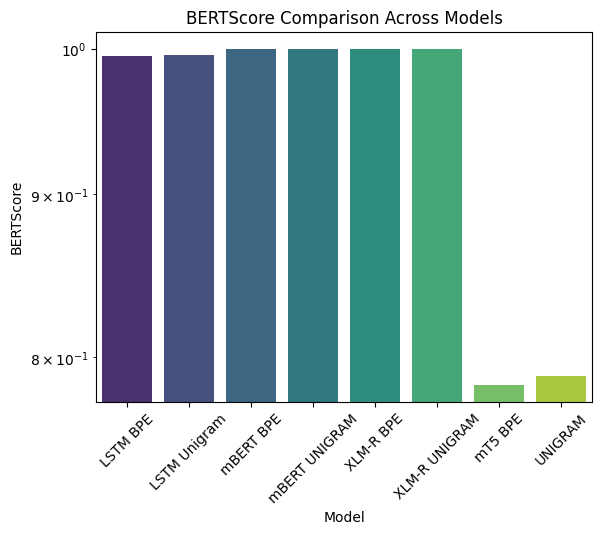

In [ ]:
# BERTScore Chart
sns.barplot(x=final_combined_df["name"], y=final_combined_df["BERT Score"], hue=final_combined_df["name"], palette="viridis", legend=False)

# Set labels and title
plt.xlabel("Model")
plt.ylabel("BERTScore")
plt.title("BERTScore Comparison Across Models")
plt.xticks(rotation=45)
plt.yscale("log")  # Log scale for better visibility

# Show plot
plt.show()

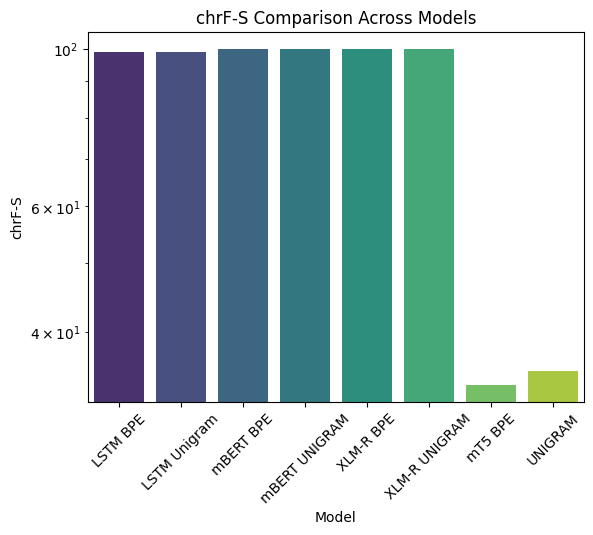

In [65]:
# chrF-S

# Plot Perplexity scores
sns.barplot(x=final_combined_df["name"], y=final_combined_df["chrF-S"], hue=final_combined_df["name"], palette="viridis", legend=False)

# Set labels and title
plt.xlabel("Model")
plt.ylabel("chrF-S")
plt.title("chrF-S Comparison Across Models")
plt.xticks(rotation=45)
plt.yscale("log")  # Log scale for better visibility

# Show plot
plt.show()

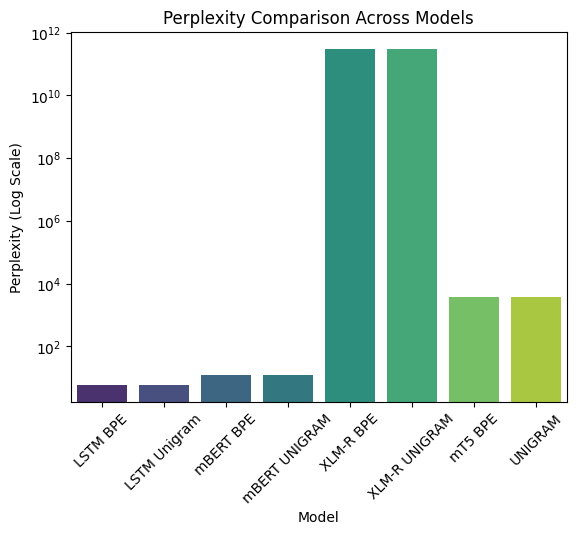

In [64]:
# Plot Perplexity scores
sns.barplot(x=final_combined_df["name"], y=final_combined_df["Perplexity"], hue=final_combined_df["name"], palette="viridis", legend=False)

# Set labels and title
plt.xlabel("Model")
plt.ylabel("Perplexity (Log Scale)")
plt.title("Perplexity Comparison Across Models")
plt.xticks(rotation=45)
plt.yscale("log")  # Log scale for better visibility

# Show plot
plt.show()